In [22]:
import pprint, itertools
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import neighbors, metrics, model_selection
from matplotlib import pyplot as plt

In [23]:
survived_test = pd.read_csv('gender_submission.csv').set_index('PassengerId')
train = pd.read_csv('train.csv').set_index('PassengerId')
test = pd.read_csv('test.csv').set_index('PassengerId')
survived_train = train['Survived']

In [24]:
train = train.drop('Survived', axis=1)
survived_train = survived_train.to_frame()

# <font color="red">Vi) Analyse des données</font>

## <font color="purple">A) Survived_train</font>

In [26]:
survived_train.describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [25]:
survived_train.notnull().all()

Survived    True
dtype: bool

In [27]:
survived_train['Survived'].unique()

array([0, 1])

In [28]:
survived_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
str(round(342./(549+342)*100)) + ' %'

'38.0 %'

#### <font color=blue>La sortie ne contient pas de valeurs aberrantes</font>
#### <font color=blue>La sortie ne contient pas de données manquantes (NaN)</font> 
#### <font color=blue>La sortie contient uniquement les valeurs 0 et 1.</font> 
#### <font color=blue>Il y a 38% de survivant, RAS !</font> 

## <font color="purple">B) Survived_test</font>

In [30]:
survived_test.notnull().all().all()

True

In [31]:
survived_test['Survived'].unique()

array([0, 1])

#### <font color="blue">Les données du survived_test n'ont pas de données manquantes ou abberantes.</font> 
#### <font color="blue">Il y a 36% de survivants, c'est une moyenne proche de celle du survived_train.</font> 
#### <font color="blue">Le survived_train et le survived_test sont homogène !</font> 

### <font color="green">RAS</font>

## <font color="purple">C) train Pclass</font>

In [33]:
train['Pclass'].isnull().any()

False

In [34]:
train['Pclass'].unique()

array([3, 1, 2])

In [35]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### <font color="blue">Les données pour Pclass sont correctes (1,2,3)</font> 

### <font color="green">RAS</font>

## <font color="purple">D) test Pclass</font>

In [37]:
test['Pclass'].notnull().all()

True

In [38]:
test['Pclass'].unique()

array([3, 2, 1])

In [39]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

%matplotlib inline
train['Pclass'].hist()

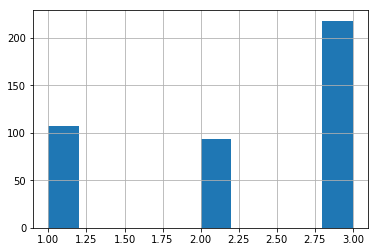

In [42]:
test['Pclass'].hist()

### <font color="purple">Distribution des valeurs pour la colonne Pclass</font>

In [44]:
t1, t2, t3 = test['Pclass'][test['Pclass'] == 1].shape[0], test['Pclass'][test['Pclass'] == 2].shape[0], test['Pclass'][test['Pclass'] == 3].shape[0]

In [45]:
t = t1 + t2 + t3

In [46]:
float(t1)/t*100, float(t2)/t*100, float(t3)/t*100

(25.598086124401913, 22.248803827751196, 52.15311004784689)

In [47]:
t1, t2, t3 = train['Pclass'][train['Pclass'] == 1].shape[0], train['Pclass'][train['Pclass'] == 2].shape[0], train['Pclass'][train['Pclass'] == 3].shape[0]

In [48]:
t = t1 + t2 + t3

In [49]:
float(t1)/t*100, float(t2)/t*100, float(t3)/t*100

(24.242424242424242, 20.65095398428732, 55.106621773288445)

#### <font color="blue">Le train set et le test set sont homogènes pour la colonne Pclass</font> 
#### <font color="blue">La distribution des valeurs 1, 2 et 3 est quasi-identique.</font> 

### <font color="green">RAS</font>

## <font color="purple">E) train Name</font>

In [51]:
train['Name'].describe()

count                           891
unique                          891
top       Graham, Mr. George Edward
freq                              1
Name: Name, dtype: object

In [52]:
train['Name'].duplicated().unique()

array([False], dtype=object)

In [53]:
(train['Name'].value_counts() > 1).any()

False

In [54]:
train['Name'].isnull().any()

False

### <font color="green">RAS</font>

## <font color="purple">F) test Name</font>

In [55]:
test['Name'].duplicated().unique()

array([False], dtype=object)

In [56]:
test['Name'].notnull().all()

True

#### <font color="purple">Comparaison entre train Name et test Name</font>

#### <font color="blue">Un nom se retrouve-t-il dans les deux sets ?</font> 

In [58]:
name = pd.concat([train['Name'], test['Name']])

In [59]:
name.duplicated().any()

True